# To be completed at the Live Session and in your own time.

These set of examples we will help you get familiar with non parametric tests and correlations within a Jupyter notebook.   The questions coloured green are important practice for CA, particularly Question 5.

Before attempting these examples, please ensure you have read through [Chapter 5 Jupyter Notebook](https://github.com/haleygomez/Data-Analysis-2024/blob/master/blended_exercises/Chapter5/Chapter5.ipynb) and have completed the Learning Central **Chapter 5 quiz**. 

***

#  Hypothesis Testing

## <font color=#30a64d>Question</font>

In the previous week, we used the datafile [worldpopulation.txt](https://github.com/haleygomez/Data-Analysis-2024/raw/master/blended_exercises/Chapter4/worldpopulation.txt) to estimate the correlation between the world population size measured over time. 

1. Measure the correlation coefficient using the in built Python package for the Spearman $\rho$ statistic. 

2. Measure it again but this time creating the functions to calculate $\rho$ from scratch.   You can use the in-built function to rank datasets from scipy.stats: `from scipy.stats import rankdata`.

### Answer

In [17]:
import numpy as np
from scipy.stats import spearmanr, rankdata

pop_data = np.loadtxt("../Chapter4/worldpopulation.txt")
time = pop_data[0,:]
people = pop_data[1,:]

print("Scipy spearman rho test gives correlation coefficient = {:.3f}.".format(spearmanr(time, people)[0]))

def spearman_own(data1, data2):
    if len(data1) != len(data2):
        print("data not of equal length")
        exit
    Rank1 = rankdata(data1)
    Rank2 = rankdata(data2)
    N = len(data1)

    sum_R1R2 = np.sum(Rank1*Rank2)
    sum_R1sq = np.sum(Rank1**2)
    sum_R2sq = np.sum(Rank2**2)
    N_factor = (N * (N + 1)**2)/4

    numerator = sum_R1R2 - N_factor
    denom_1 = np.sqrt(sum_R1sq - N_factor)
    denom_2 = np.sqrt(sum_R2sq - N_factor)

    rho = numerator/(denom_1 * denom_2)
    return rho

print("Own spearman rho test gives correlation coefficient = {:.3f}.".format(spearman_own(time, people)))


Scipy spearman rho test gives correlation coefficient = 1.000.
Own spearman rho test gives correlation coefficient = 1.000.


***

# KS Test

## Question

Two near-by apple trees are in bloom in an otherwise empty field. One is a Whitney Crab the other is a Redwell. We want to test if bees prefer one tree to the other.

To do this we collect data. We use a stop watch to time how long a bee stays near a particular tree. We begin to time when the bee touches the tree, we stop timing when the bee is more than a metre from the tree. Unfortunately we did not get exactly the same number of bees for each tree as it started to rain.   The data is below (time is in seconds). Can we conclude anything based on our experiment?

redwell= 23.4, 30.9, 18.8, 23.0, 21.4, 1, 24.6, 23.8, 24.1, 18.7, 16.3, 20.3, 14.9, 35.4, 21.6, 21.2, 21.0, 15.0, 15.6, 24.0, 34.6, 40.9, 30.7, 24.5, 16.6, 1, 21.7, 1, 23.6, 1, 25.7, 19.3, 46.9, 23.3, 21.8, 33.3, 24.9, 24.4, 1, 19.8, 17.2, 21.5, 25.5, 23.3, 18.6, 22.0, 29.8, 33.3, 1, 21.3, 18.6, 26.8, 19.4, 21.1, 21.2, 20.5, 19.8, 26.3, 39.3, 21.4, 22.6, 1, 35.3, 7.0, 19.3, 21.3, 10.1, 20.2, 1, 36.2, 16.7, 21.1, 39.1, 19.9, 32.1, 23.1, 21.8, 30.4, 19.62, 15.5 

whitney=16.5, 1, 22.6, 25.3, 23.7, 1, 23.3, 23.9, 16.2, 23.0, 21.6, 10.8, 12.2, 23.6, 10.1, 24.4, 16.4, 11.7, 17.7, 34.3, 24.3, 18.7, 27.5, 25.8, 22.5, 14.2, 21.7, 1, 31.2, 13.8, 29.7, 23.1, 26.1, 25.1, 23.4, 21.7, 24.4, 13.2, 22.1, 26.7, 22.7, 1, 18.2, 28.7, 29.1, 27.4, 22.3, 13.2, 22.5, 25.0, 1, 6.6, 23.7, 23.5, 17.3, 24.6, 27.8, 29.7, 25.3, 19.9, 18.2, 26.2, 20.4, 23.3, 26.7, 26.0, 1, 25.1, 33.1, 35.0, 25.3, 23.6, 23.2, 20.2, 24.7, 22.6, 39.1, 26.5, 22.7

### Answer

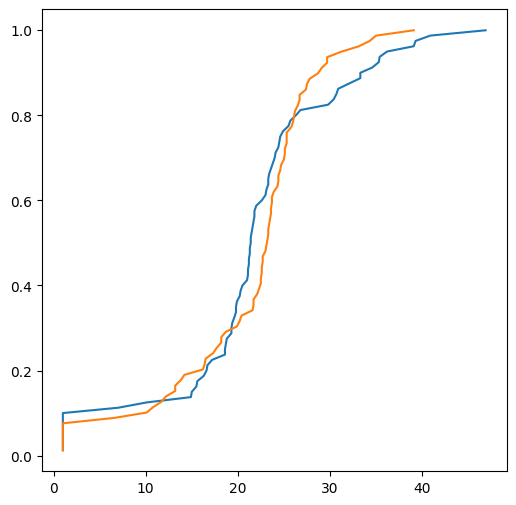

D = 0.220
p = 0.034


In [22]:
import matplotlib.pyplot as plt

redwell = [23.4, 30.9, 18.8, 23.0, 21.4, 1, 24.6, 23.8, 24.1, 18.7, 16.3, 20.3, 14.9, 35.4, 21.6, 21.2, 21.0, 15.0, 15.6, 24.0, 34.6, 40.9, 30.7, 24.5, 16.6, 1, 21.7, 1, 23.6, 1, 25.7, 19.3, 46.9, 23.3, 21.8, 33.3, 24.9, 24.4, 1, 19.8, 17.2, 21.5, 25.5, 23.3, 18.6, 22.0, 29.8, 33.3, 1, 21.3, 18.6, 26.8, 19.4, 21.1, 21.2, 20.5, 19.8, 26.3, 39.3, 21.4, 22.6, 1, 35.3, 7.0, 19.3, 21.3, 10.1, 20.2, 1, 36.2, 16.7, 21.1, 39.1, 19.9, 32.1, 23.1, 21.8, 30.4, 19.62, 15.5]

whitney = [16.5, 1, 22.6, 25.3, 23.7, 1, 23.3, 23.9, 16.2, 23.0, 21.6, 10.8, 12.2, 23.6, 10.1, 24.4, 16.4, 11.7, 17.7, 34.3, 24.3, 18.7, 27.5, 25.8, 22.5, 14.2, 21.7, 1, 31.2, 13.8, 29.7, 23.1, 26.1, 25.1, 23.4, 21.7, 24.4, 13.2, 22.1, 26.7, 22.7, 1, 18.2, 28.7, 29.1, 27.4, 22.3, 13.2, 22.5, 25.0, 1, 6.6, 23.7, 23.5, 17.3, 24.6, 27.8, 29.7, 25.3, 19.9, 18.2, 26.2, 20.4, 23.3, 26.7, 26.0, 1, 25.1, 33.1, 35.0, 25.3, 23.6, 23.2, 20.2, 24.7, 22.6, 39.1, 26.5, 22.7]

def cdf(x):
    xs = np.sort(x)
    ys = np.arange(1, len(xs)+1)/float(len(xs))
    return xs, ys

r_t, r_cdf = cdf(redwell)
w_t, w_cdf = cdf(whitney)

plt.figure(figsize=(6,6))
plt.plot(r_t, r_cdf)
plt.plot(w_t, w_cdf)
plt.show()

from scipy.stats import ks_2samp

corr, sig = ks_2samp(redwell, whitney)
print("D = {:.3f}".format(corr))
print("p = {:.3f}".format(sig))
print("p-value is less than 0.05 so we can reject the null hypothesis that there is no difference between the sample.")

In [28]:
# Writing my own KS function

## this didn't work :(

def cdf(x):
    xs = np.sort(x)
    ys = np.arange(1, len(xs)+1)/float(len(xs))
    return xs, ys

def K_lambda(lam):
    j = np.arange(1,99)
    sum_arg = 0
    for i in range(len(j)):
        sum_arg += (-1)**(j[i]-1) * np.exp(-2 * j[i]**2 * lam**2)
    K = 2 * sum_arg
    return K

def KS_D(cdf1, cdf2):
    L = min(len(cdf1), len(cdf2))
    D_arr = np.abs(cdf1[:L] - cdf2[:L])
    D_max = max(D_arr)
    return D_max

r_t, r_cdf = cdf(redwell)
w_t, w_cdf = cdf(whitney)

D = KS_D(r_cdf, w_cdf)

def N_e(data1, data2):
    N1 = len(data1)
    N2 = len(data2)
    Ne = N1*N2/(N1 + N2)
    return Ne

Ne = N_e(redwell,whitney)

K_arg = (np.sqrt(Ne) + 0.12 + 0.11*np.sqrt(Ne))*D
print(K_arg)
p = K_lambda(K_arg)

print (D, p)

0.0889768163356804
0.012499999999999956 0.9999999999999998


***

# Chi-square test

## Question 

You publish flyers for an event in three different colours and want to test whether the colour has a significant effect on whether people take them. The data is available below.  Use the $\chi^2$ test to do this, and calculate the probability of the significance of the result.

| |white | light blue | neon pink | Totals|
|---|---|---|---|---|
|Take | 32| 38 | 20| 90| 
|Don't take | 8| 22 |30 | 60| 
|Totals | 40|60 | 50| 150| 

### Answer

In [52]:
def chi_sq(obs, exp):
    chi_sum = 0
    for k in range(len(obs)):
        chi_sum += ((obs[k] - exp[k])**2)/exp[k]
    return chi_sum

white = [32,8]
blue = [38,22]
pink = [20,30]

data = np.asarray((white, blue, pink)) # indexed by colour, yes/no in colour order, white, blue, pink

total_opt1 = np.sum(data[0,:])
total_opt2 = np.sum(data[1,:])
total_opt3 = np.sum(data[2,:])
total = total_opt1 + total_opt2 + total_opt3

prop_opt1 = total_opt1/total
prop_opt2 = total_opt2/total
prop_opt3 = total_opt3/total

total_res1 = np.sum(data[:,0])
total_res2 = np.sum(data[:,1])

expected = np.array(([prop_opt1*total_res1, prop_opt1*total_res2],
                      [prop_opt2*total_res1, prop_opt2*total_res2],
                      [prop_opt3*total_res1, prop_opt3*total_res2]))

data = data.flatten()
expected = expected.flatten()

print(chi_sq(data, expected))

[24. 16. 36. 24. 30. 20.]
15.277777777777777


***